In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
import os
import torch
import torchvision
import torchvision.transforms as transforms
from skimage.io import imread
from sklearn import svm
import cv2
from sklearn import preprocessing


In [2]:
# loading dataset
train = pd.read_csv('Train.csv')
train.head()
test = pd.read_csv('Test.csv')
test.head()
# meta_data = pd.read_csv('Meta.csv')
# meta_data.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [3]:
test.shape


(12630, 8)

In [4]:
train_x=[]
for i in train['Path']:
    try:
        img = Image.fromarray(cv2.imread(i), 'RGB')
        train_x.append(np.array(img.resize((32, 32))))
    except AttributeError:
        print("Error in loading image")
 
#  defining the target
train_x=np.array(train_x)
train_y = np.array(train['ClassId'].values)
train_x.shape

(39209, 32, 32, 3)

In [5]:
test_x=[]
for i in test['Path']:
    try:
        img = Image.fromarray(cv2.imread(i), 'RGB')
        test_x.append(np.array(img.resize((32, 32))))

    except AttributeError:
        print("Error in loading image")
 

# defining the target
test_x=np.array(test_x)
test_y = np.array(test['ClassId'].values)
test_x.shape

(12630, 32, 32, 3)

(<matplotlib.axes._subplots.AxesSubplot at 0x237f70f9708>,
 <matplotlib.image.AxesImage at 0x237f6d8d448>)

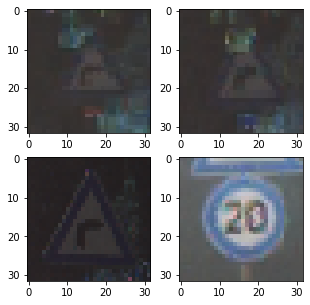

In [6]:
i = 0
plt.figure(figsize=(5,5))
plt.subplot(221), plt.imshow(train_x[i])
plt.subplot(222), plt.imshow(train_x[i+5])
plt.subplot(223), plt.imshow(train_x[i+25])
plt.subplot(224), plt.imshow(train_x[i+521])

In [7]:
# X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, test_size = 0.2,random_state=123)
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape) 

(((39209, 32, 32, 3), (39209,)), ((12630, 32, 32, 3), (12630,)))

In [8]:
train_x.resize(39209,3072)
test_x.resize(12630,3072)
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)


In [9]:
clf = svm.NuSVC(nu=0.1,kernel='rbf',gamma=0.001,random_state=121) # random state 121
# clf = svm.SVC(kernel='rbf',gamma=0.001,break_ties=True,decision_function_shape='ovo',C=0.001,probability=True,random_state=121,) # Linear Kernel

In [ ]:
tic = time.clock()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)

toc = time.clock()
toc - tic

In [ ]:
acc_svm=metrics.accuracy_score(test_y,y_pred)*100 
acc_svm

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_y, y_pred)))